In [4]:
import pandas as pd

In [2]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
mall = pd.read_csv(r'C:\Users\rahul\Desktop\Mall_Customers.csv')

In [7]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
X = mall.iloc[:,[3,4]].values

In [11]:
mall.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [12]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
from sklearn.cluster import KMeans

In [14]:
inertia = []
for i in range(1,15):
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    

In [15]:
X.var

<function ndarray.var>

In [16]:
X.var()

701.7855999999999

In [18]:
mall.var()

CustomerID                3350.000000
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler= StandardScaler()

In [22]:
X_scaled = scaler.fit_transform(X)

In [24]:
X_scaled.var()

1.0

In [27]:
wcss = []
for i in range(1,15):
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    

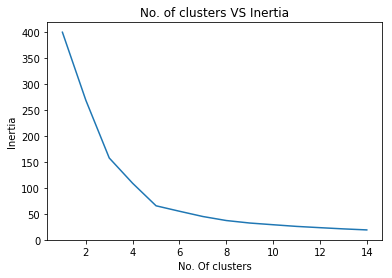

In [29]:
plt.plot(range(1,15), wcss)
plt.title('No. of clusters VS Inertia')
plt.xlabel('No. Of clusters')
plt.ylabel('Inertia')
plt.show()

In [30]:
kmeans= KMeans(n_clusters=5, init='k-means++', random_state=0)

In [31]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [40]:
y_kmeans = kmeans.fit_predict(X_scaled)

In [41]:
labels = kmeans.labels_

In [42]:
centroids = kmeans.cluster_centers_

In [58]:
centroids
labels


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

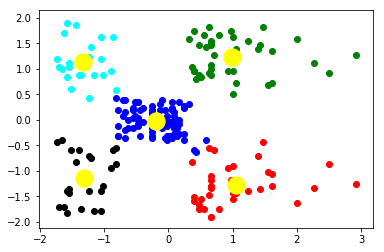

In [62]:
plt.scatter(X_scaled[y_kmeans==0, 0], X_scaled[y_kmeans==0,1], c='red')
plt.scatter(X_scaled[y_kmeans==1, 0], X_scaled[y_kmeans==1,1], c='blue')
plt.scatter(X_scaled[y_kmeans==2, 0], X_scaled[y_kmeans==2,1], c='green')
plt.scatter(X_scaled[y_kmeans==3, 0], X_scaled[y_kmeans==3,1], c='cyan')
plt.scatter(X_scaled[y_kmeans==4, 0], X_scaled[y_kmeans==4,1], c='black')
plt.scatter(centroids[:,0], centroids[:,1], s=300, c='yellow')
plt.show()

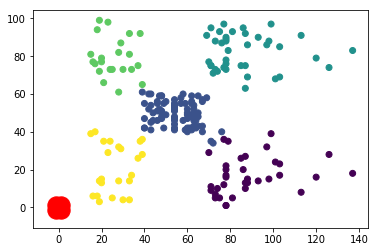

In [69]:
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',data = mall, c=labels)
plt.scatter(x = centroids[:,0], y = centroids[:,1], s=300, c='red')
plt.show()

In [48]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [50]:
kmeans.inertia_

65.56840815571681

In [56]:
plt.scatter(labels[:,0], labels[:,1], c='green')

IndexError: too many indices for array